In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('raj_fyp.csv')
data.head()

,contrast,correlation,energy,entropy,homogeneity,output
0,0.730484,0.792608,0.088069,7.540140,0.765037,0
1,0.406403,0.876353,0.117659,7.254699,0.815166,0
2,0.635570,0.898905,0.063116,7.810925,0.788828,0
3,0.814017,0.860312,0.059063,7.757064,0.751398,0
4,0.525291,0.907818,0.080637,7.715684,0.825797,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028126C5DE08>,
      dtype=object)

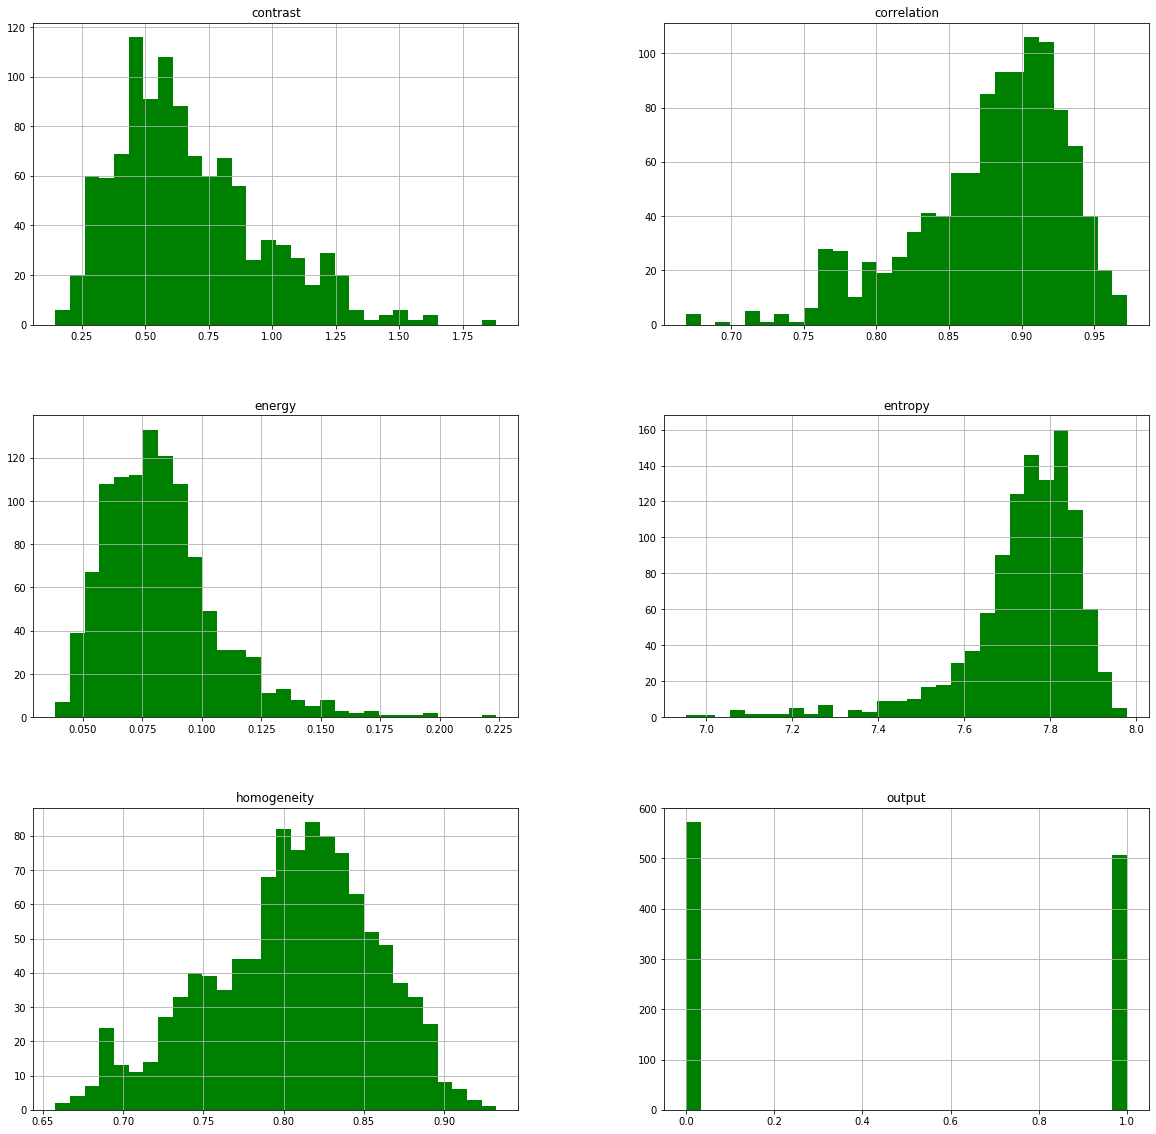

In [3]:
data.hist(bins = 30, figsize = (20, 20), color='g')

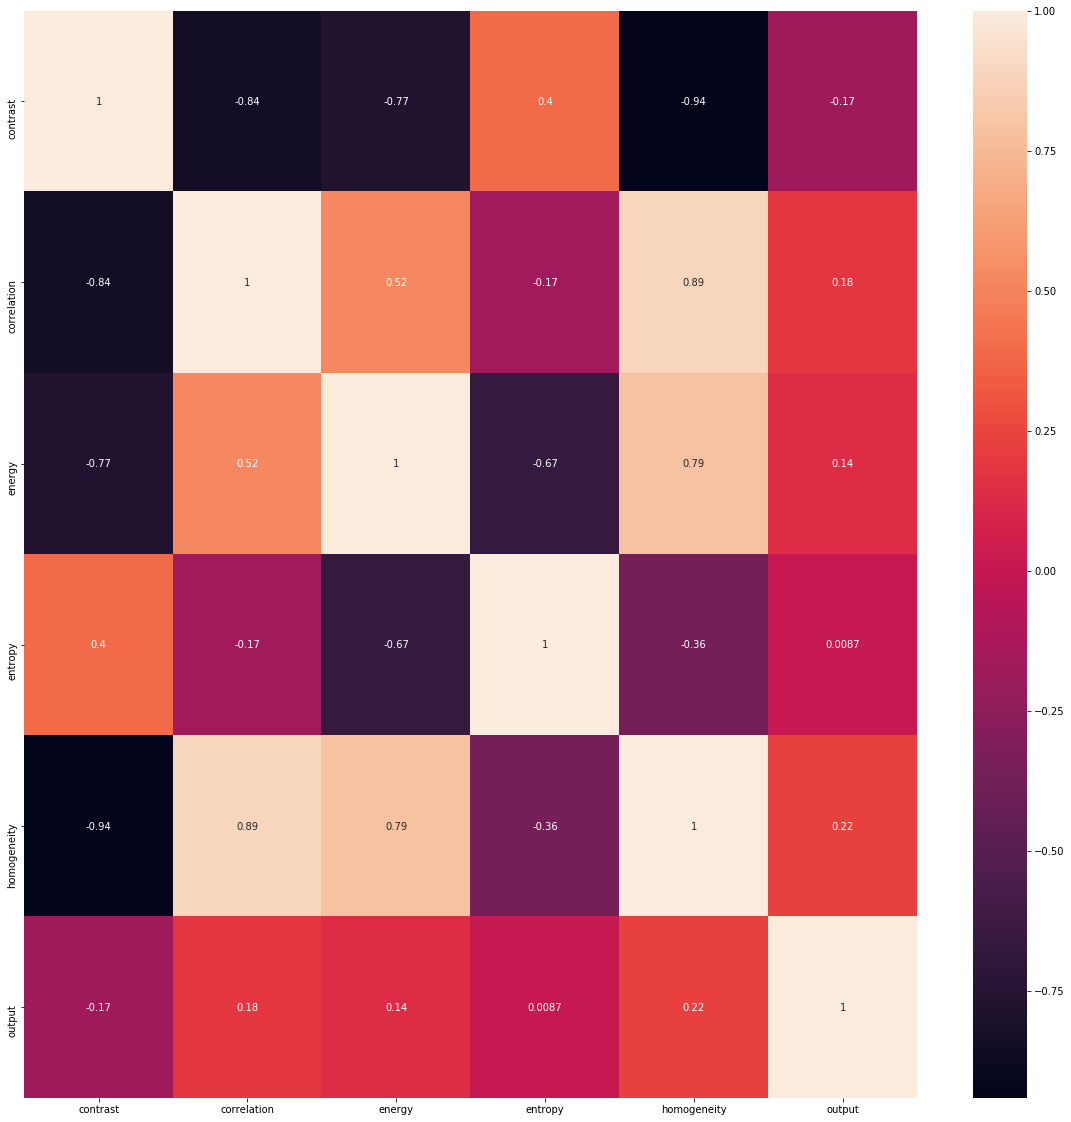

In [4]:
corr_matrix = data.corr()
plt.figure(figsize=(20,20,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = data.drop("output", axis=1) #data[["contrast", "entropy"]]
y = data[["output"]]
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [6]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [8]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:67.51740139211137
Test Set Accuracy:64.35185185185185

Confusion Matrix:
[[80 36]
 [41 59]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       116
           1       0.62      0.59      0.61       100

    accuracy                           0.64       216
   macro avg       0.64      0.64      0.64       216
weighted avg       0.64      0.64      0.64       216



C:\Anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(X_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test,y_test)*100,2)))
#Training Result
print_score(lr,X_train,y_train,X_test,y_test,train=True)
#Test Result
print_score(lr,X_train,y_train,X_test,y_test,train=False)

C:\Anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 59.72%
Training results:

Accuracy Score: 0.5835

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       451
           1       0.57      0.54      0.55       411

    accuracy                           0.58       862
   macro avg       0.58      0.58      0.58       862
weighted avg       0.58      0.58      0.58       862


Confusion Matrix:
[[283 168]
 [191 220]]

Average Accuracy:	0.5755

Standard Deviation:	0.0420
Test results:

Accuracy Score: 0.5972

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       121
           1       0.54      0.56      0.55        95

    accuracy                           0.60       216
   macro avg       0.59      0.59      0.59       216
weighted avg       0.60      0.60      0.60       216


Confusion Matrix:
[[76 45]
 [42 53]]



In [10]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test,y_test)*100,2)))

Test Accuracy: 58.8%


C:\Anaconda\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#Decision Tree classicfication
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))

Test Accuracy: 71.76%


In [12]:
#Training Result
print_score(dt,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       411

    accuracy                           1.00       862
   macro avg       1.00      1.00      1.00       862
weighted avg       1.00      1.00      1.00       862


Confusion Matrix:
[[451   0]
 [  0 411]]

Average Accuracy:	0.7100

Standard Deviation:	0.0292


In [13]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))

C:\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Test Accuracy: 74.54%


In [14]:
#Training Result
print_score(rf,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       411

    accuracy                           1.00       862
   macro avg       1.00      1.00      1.00       862
weighted avg       1.00      1.00      1.00       862


Confusion Matrix:
[[451   0]
 [  0 411]]

Average Accuracy:	0.7541

Standard Deviation:	0.0465


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
#Separating predictors and  Response

X=data.drop('output',axis=1) #Predictors
y=data['output'] #Response
X.head()

,contrast,correlation,energy,entropy,homogeneity
0,0.730484,0.792608,0.088069,7.540140,0.765037
1,0.406403,0.876353,0.117659,7.254699,0.815166
2,0.635570,0.898905,0.063116,7.810925,0.788828
3,0.814017,0.860312,0.059063,7.757064,0.751398
4,0.525291,0.907818,0.080637,7.715684,0.825797


In [17]:
#Encoding categorical data label encoding


from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [18]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [19]:
#Spliting dataset into trainig and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#Applying PCA with n_components = 2

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [22]:
#Functions to visualize Training & Test Set Results.

def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [23]:
#initialize classifier

classifier = Sequential()

In [24]:
#Adding Layers

classifier.add(Dense(8, kernel_initializer='uniform', activation= 'relu', input_dim = 2))
classifier.add(Dense(6, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(4, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
#Fitting ANN to Training Set

classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Train on 754 samples
Epoch 1/100
754/754 [==============================] - 1s 702us/sample - loss: 0.6931 - acc: 0.5186
Epoch 2/100
754/754 [==============================] - 0s 277us/sample - loss: 0.6930 - acc: 0.5172
Epoch 3/100
754/754 [==============================] - 0s 285us/sample - loss: 0.6929 - acc: 0.5172
Epoch 4/100
754/754 [==============================] - 0s 297us/sample - loss: 0.6928 - acc: 0.5172
Epoch 5/100
754/754 [==============================] - 0s 296us/sample - loss: 0.6928 - acc: 0.5172
Epoch 6/100
754/754 [==============================] - 0s 280us/sample - loss: 0.6928 - acc: 0.5172
Epoch 7/100
754/754 [==============================] - 0s 267us/sample - loss: 0.6927 - acc: 0.5172
Epoch 8/100
754/754 [==============================] - 0s 402us/sample - loss: 0.6927 - acc: 0.5172
Epoch 9/100
754/754 [==============================] - 0s 375us/sample - loss: 0.6926 - acc: 0.5172
Epoch 10/100
754/754 [==============================] - 0s 418us/sample - loss:

754/754 [==============================] - 0s 267us/sample - loss: 0.6926 - acc: 0.5172
Epoch 82/100
754/754 [==============================] - 0s 352us/sample - loss: 0.6926 - acc: 0.5172
Epoch 83/100
754/754 [==============================] - 0s 362us/sample - loss: 0.6926 - acc: 0.5172
Epoch 84/100
754/754 [==============================] - 0s 197us/sample - loss: 0.6926 - acc: 0.5172
Epoch 85/100
754/754 [==============================] - 0s 172us/sample - loss: 0.6926 - acc: 0.5172
Epoch 86/100
754/754 [==============================] - 0s 231us/sample - loss: 0.6926 - acc: 0.5172
Epoch 87/100
754/754 [==============================] - 0s 274us/sample - loss: 0.6926 - acc: 0.5172
Epoch 88/100
754/754 [==============================] - 0s 450us/sample - loss: 0.6926 - acc: 0.5172
Epoch 89/100
754/754 [==============================] - 0s 405us/sample - loss: 0.6926 - acc: 0.5172
Epoch 90/100
754/754 [==============================] - 0s 282us/sample - loss: 0.6926 - acc: 0.5172
Epo

In [26]:
#Predicting the Test Set Results

y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


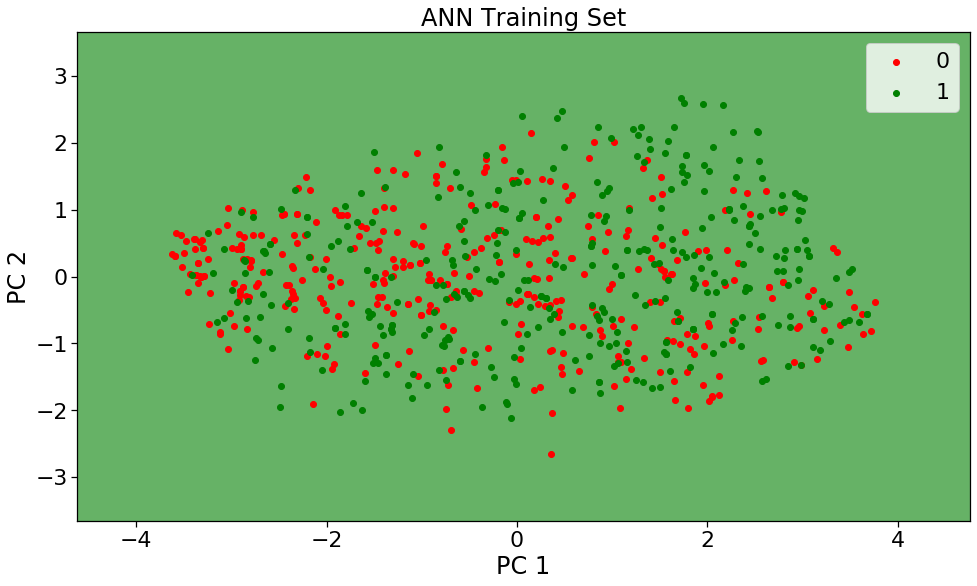

In [27]:
#Visualizing ANN Training Set results
visualization_train(model='ANN')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


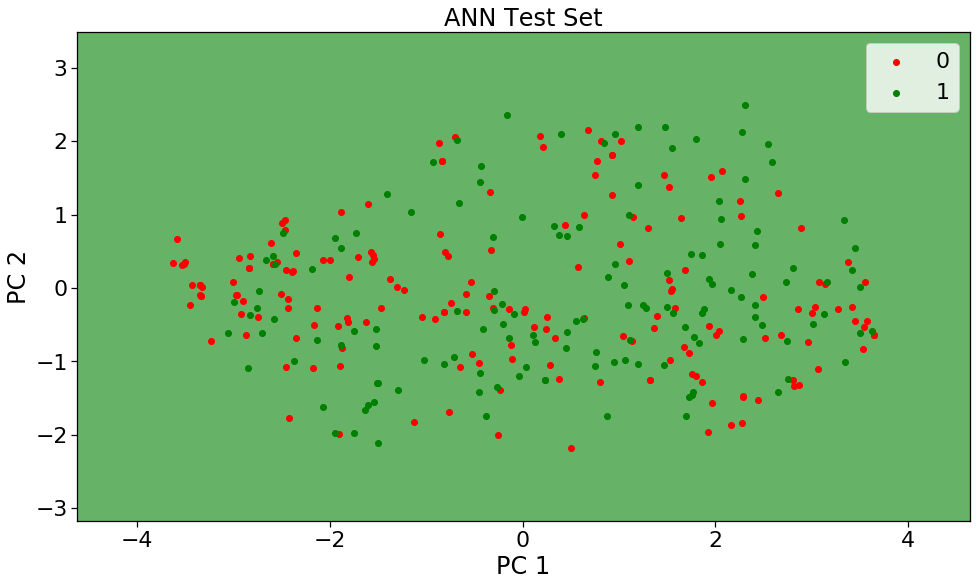

In [28]:
#Visualizing ANN Test Set results
visualization_test(model='ANN')